<a href="https://colab.research.google.com/github/S-Ahsan-Haider/Case-Studies/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data

In [ ]:
from google.colab import files
uploaded = files.upload()

# SELECT THE . csv FILE FROM YOUR COMPUTER

Saving aerofit_treadmill.csv to aerofit_treadmill.csv


In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(io.BytesIO(uploaded['aerofit_treadmill.csv']))

In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Defining Problem Statement and Analysing basic metrics

Highlight and analyse the purchasing trends of three different products of the company Aerofit: KP281, 481 and 781. Suggest implementable insights from the given data

In [ ]:
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
data.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
data.shape

(180, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
max_age = data['Age'].max()
min_age = data['Age'].min()
min_age, max_age

(18, 50)

In [ ]:
# Creating Age Category

bins = [10,20,30,40,50,60]
labels = ['below 20','20-30','30-40','40-50','above 50']
data['Age_Cat'] = pd.cut(data['Age'], bins=bins, labels=labels)

data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,below 20
1,KP281,19,Male,15,Single,2,3,31836,75,below 20
2,KP281,19,Female,14,Partnered,4,3,30699,66,below 20
3,KP281,19,Male,12,Single,3,3,32973,85,below 20
4,KP281,20,Male,13,Partnered,4,2,35247,47,below 20
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,30-40
176,KP781,42,Male,18,Single,5,4,89641,200,40-50
177,KP781,45,Male,16,Single,5,5,90886,160,40-50
178,KP781,47,Male,18,Partnered,4,5,104581,120,40-50


In [ ]:
max_income = data['Income'].max()
min_income = data['Income'].min()
min_income, max_income

(29562, 104581)

In [ ]:
# Creating Income Category

bins = [20000,30000,50000,70000,90000,110000]
labels = ['below 30K','30K-50K','50K-70K','70K-90K','above 90K']
data['Income_Cat'] = pd.cut(data['Income'], bins=bins, labels=labels)

data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Cat,Income_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,below 20,below 30K
1,KP281,19,Male,15,Single,2,3,31836,75,below 20,30K-50K
2,KP281,19,Female,14,Partnered,4,3,30699,66,below 20,30K-50K
3,KP281,19,Male,12,Single,3,3,32973,85,below 20,30K-50K
4,KP281,20,Male,13,Partnered,4,2,35247,47,below 20,30K-50K
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,30-40,70K-90K
176,KP781,42,Male,18,Single,5,4,89641,200,40-50,70K-90K
177,KP781,45,Male,16,Single,5,5,90886,160,40-50,above 90K
178,KP781,47,Male,18,Partnered,4,5,104581,120,40-50,above 90K


## Non-Graphical Analysis: Value Counts and Unique Attirbutes

In [ ]:
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
data['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [ ]:
data['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [ ]:
data['Usage'].unique

<bound method Series.unique of 0      3
1      2
2      4
3      3
4      4
      ..
175    6
176    5
177    5
178    4
179    4
Name: Usage, Length: 180, dtype: int64>

In [ ]:
prod_data = data.groupby('Product')
prod_data.agg({'Age':['max','min','mean'],'Income':['max','min','mean'], 'Miles':['max','min','mean']})

Age             Income                   Miles                
        max min   mean     max    min       mean   max min        mean
Product                                                               
KP281    50  18  28.55   68220  29562  46418.025   188  38   82.787500
KP481    48  19  28.90   67083  31836  48973.650   212  21   87.933333
KP781    48  22  29.10  104581  48556  75441.575   360  80  166.900000

## Visual Analysis - *Univariate* & *Bivariate*

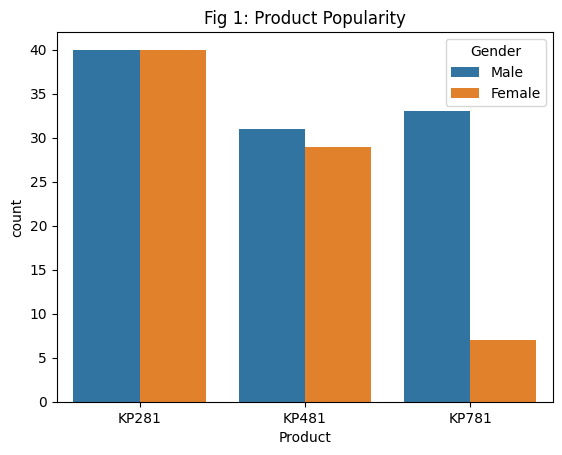

In [ ]:
# Figure 1

sns.countplot(data = data, x= 'Product', hue='Gender', order = data['Product'].value_counts().index)
plt.xticks(rotation = 0)
plt.title("Fig 1: Product Popularity")
plt.show()

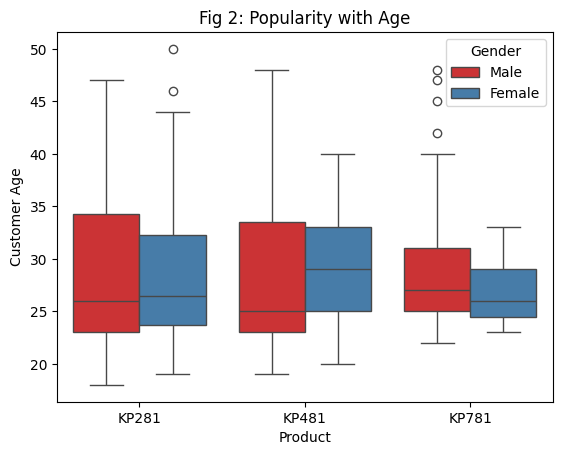

In [ ]:
# Figure 2

sns.boxplot(data=data, x='Product', y='Age', palette='Set1', hue = 'Gender')

plt.title('Fig 2: Popularity with Age')
plt.xlabel('Product')
plt.ylabel('Customer Age')
plt.xticks(rotation = 0)
plt.show()

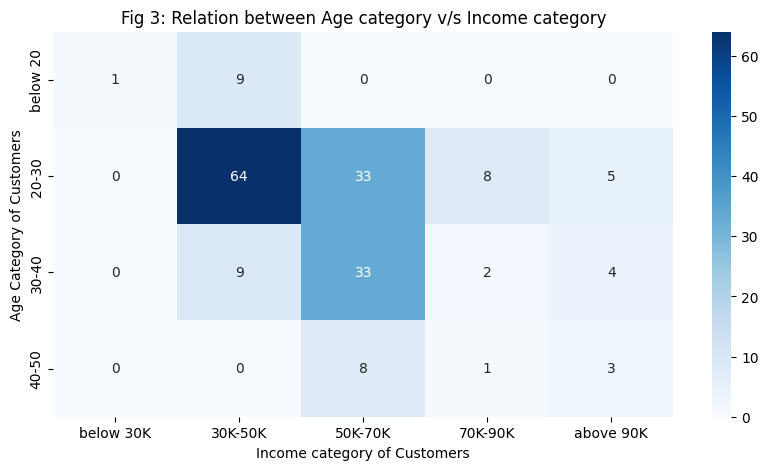

In [ ]:
# Figure 3

genre_cross = pd.crosstab(data['Age_Cat'], data['Income_Cat'])
plt.figure(figsize=(10, 5))
sns.heatmap(genre_cross, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Income category of Customers')
plt.ylabel('Age Category of Customers')

plt.title('Fig 3: Relation between Age category v/s Income category')
plt.show()

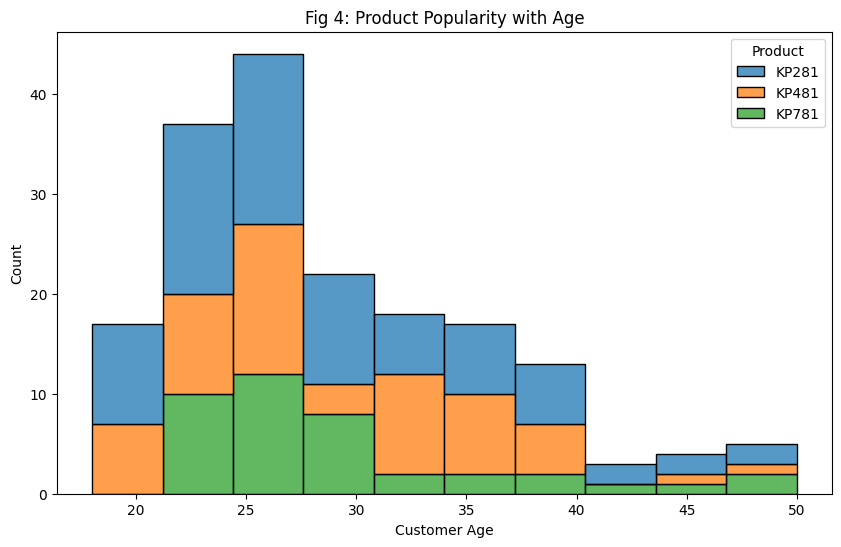

In [ ]:
# Figure 4

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Product', multiple='stack', bins=10)
plt.title('Fig 4: Product Popularity with Age')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()

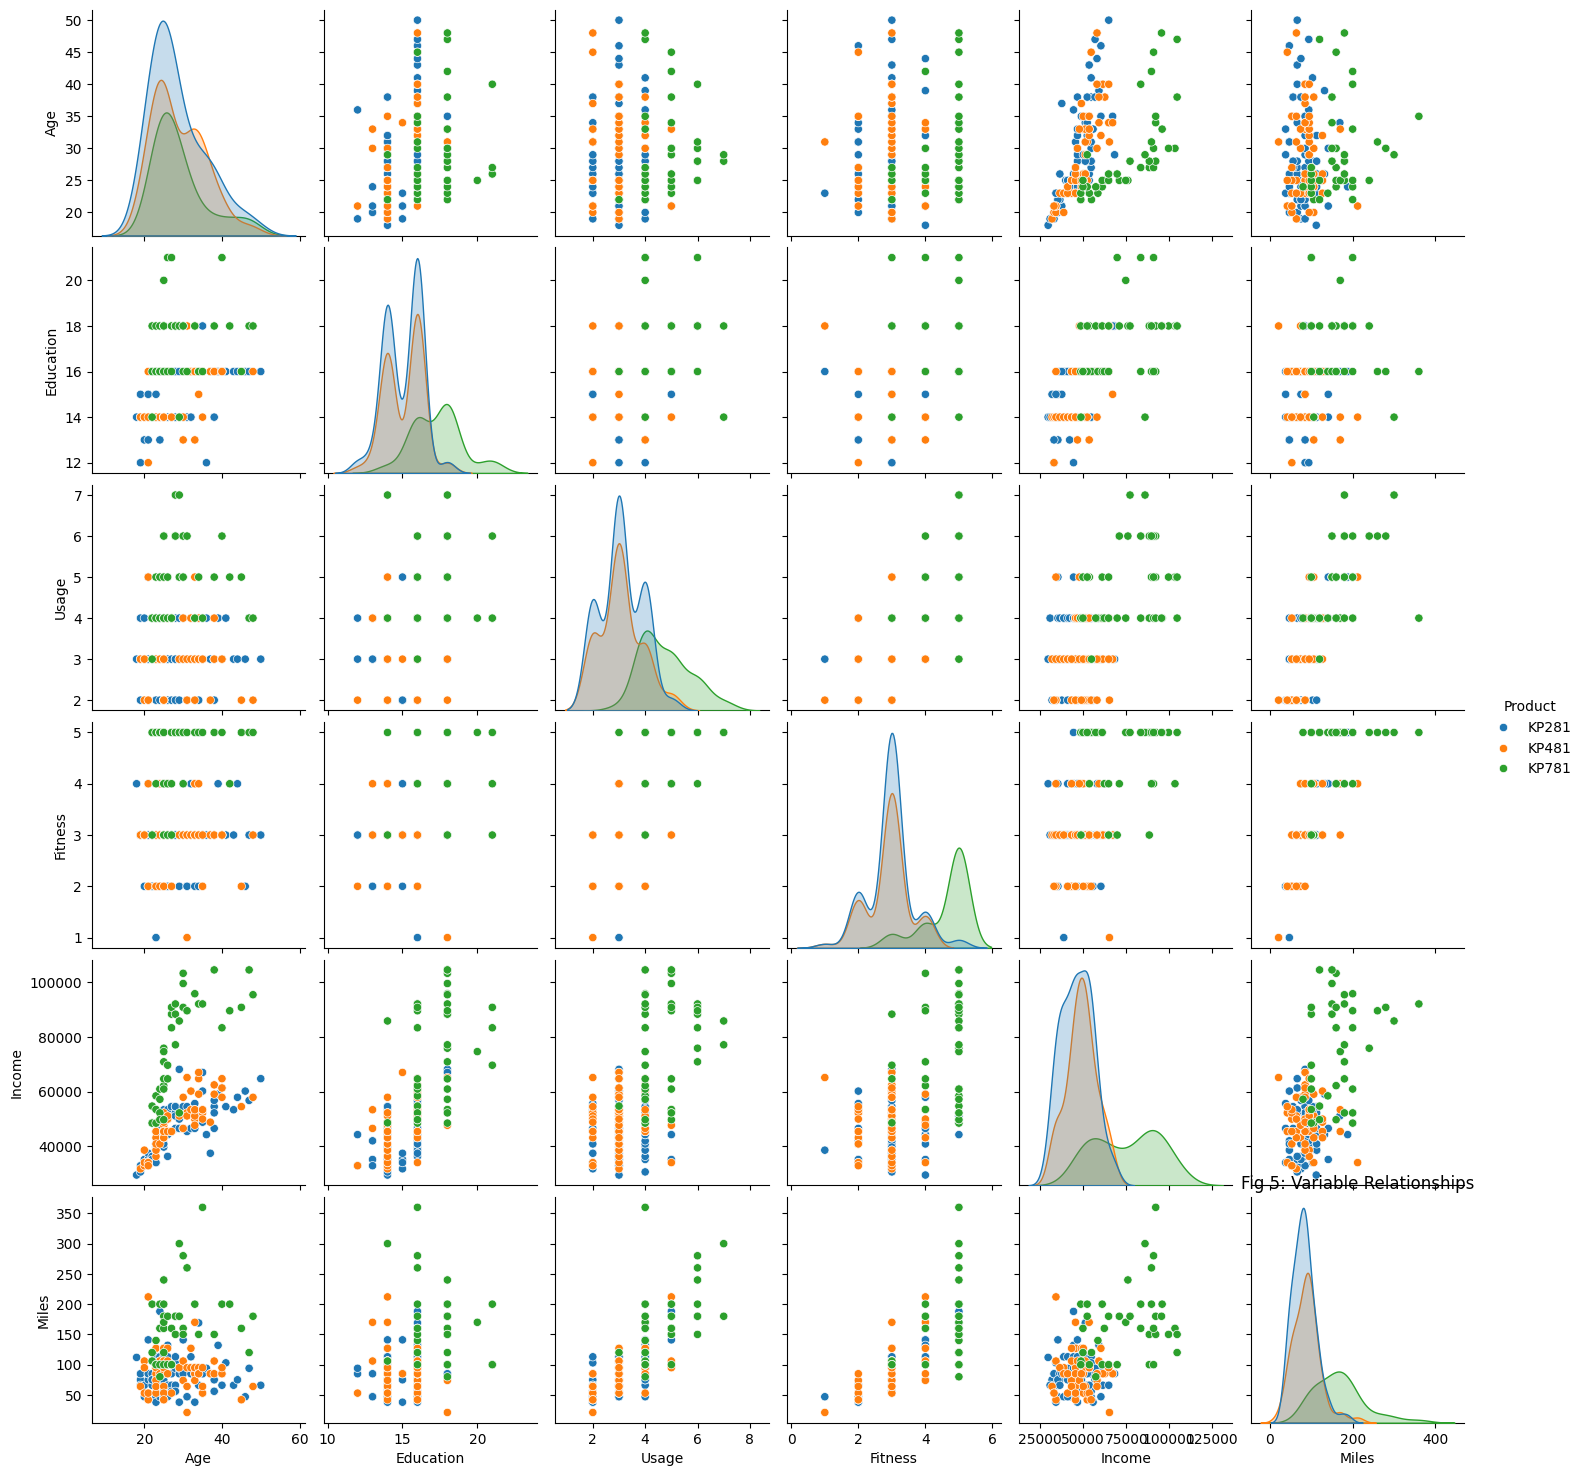

In [ ]:
# Figure 5

sns.pairplot(data, hue='Product')
plt.title('Fig 5: Variable Relationships')
plt.show()

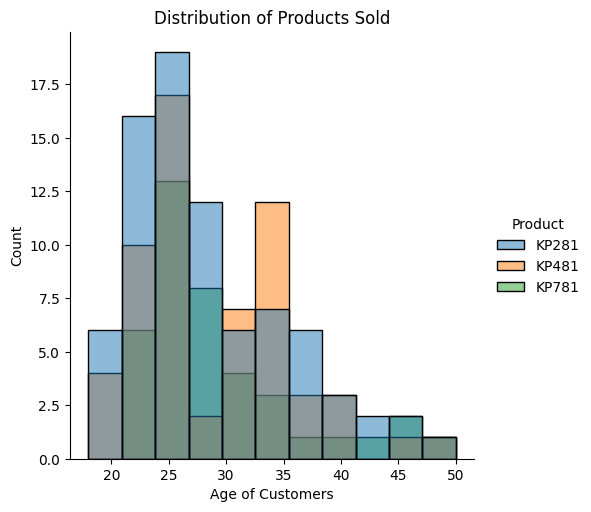

In [ ]:
# Figure 6u (UNUSED, hence, please see FIGURE 6 for similar analysis)

product_counts = data['Product'].value_counts()
sns.displot(data=data, x='Age', hue ='Product', discrete=False)
plt.title('Distribution of Products Sold')
plt.xlabel('Age of Customers')
plt.ylabel('Count')
plt.show()

**Comment**: The distplot function in Seaborn has been deprecated in the latest versions of Seaborn. Therefore, I have used the kdeplot for Kernel Density Estimates (KDE)

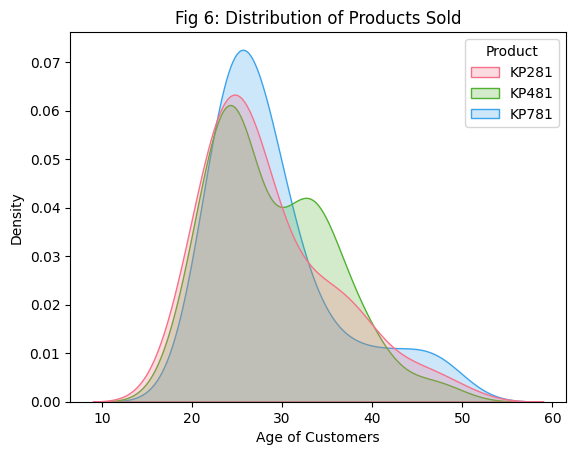

In [ ]:
# Figure 6

sns.kdeplot(data=data, x='Age', hue='Product', fill=True, common_norm=False, palette='husl')
plt.title('Fig 6: Distribution of Products Sold')
plt.xlabel('Age of Customers')
plt.ylabel('Density')
plt.show()

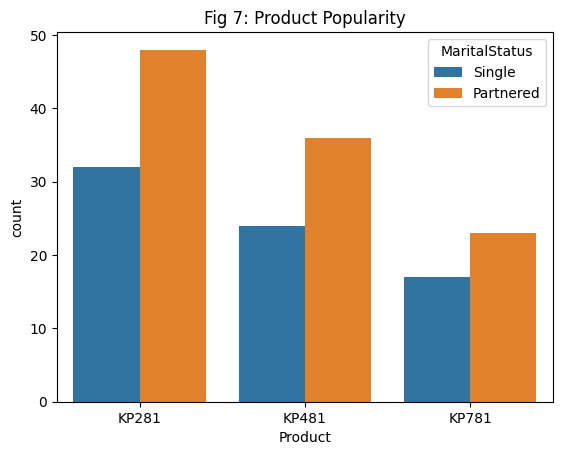

In [ ]:
# Figure 7

sns.countplot(data = data, x= 'Product', hue='MaritalStatus', order = data['Product'].value_counts().index)
plt.xticks(rotation = 0)
plt.title("Fig 7: Product Popularity")
plt.show()

In [ ]:
# Table 1

cross_table = pd.crosstab(index = data['Product'], columns='Count', margins=True, margins_name='Total')
marginal_probabilities = cross_table / cross_table.loc['Total', 'Count']
print("Table 1: Probability of Purchasing a Specific Product")
print(marginal_probabilities)

Table 1: Probability of Purchasing a Specific Product
col_0       Count     Total
Product                    
KP281    0.444444  0.444444
KP481    0.333333  0.333333
KP781    0.222222  0.222222
Total    1.000000  1.000000


**Comments**:
There is a probability of 44.4% that customers to purchase KP281, 33.3% to purchase KP481, while only 22.2% to purchase KP781.

In [ ]:
# Table 2

cp_gender = pd.crosstab(index=data['Product'], columns=data['Gender'], margins=True, margins_name='Total', normalize='index')
print("Table 2: Conditional Probability of Purchasing a Specific Product given Gender:")
print(cp_gender)


Table 2: Conditional Probability of Purchasing a Specific Product given Gender:
Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000
Total    0.422222  0.577778


**Comments**:


*   For males, there is a probability of 50.0% that customers to purchase KP281, 51.7% to purchase KP481, while only 82.5% to purchase KP781.
*   For females, there is a probability of 50.0% that customers to purchase KP281, 48.3% to purchase KP481, while only 17.5% to purchase KP781.
*   Overall, males are more likely to buy (57.8% chance) these products compared to females (42.2% chance)







In [ ]:
# Table 3

cp_age = pd.crosstab(index = data['Product'], columns = data['Age_Cat'], margins=True, margins_name='Total', normalize='index')
print("Conditional Probability of Purchasing a Specific Product given Age Range:")
print(cp_age)

Conditional Probability of Purchasing a Specific Product given Age Range:
Age_Cat  below 20     20-30     30-40     40-50
Product                                        
KP281    0.075000  0.612500  0.237500  0.075000
KP481    0.066667  0.516667  0.383333  0.033333
KP781    0.000000  0.750000  0.150000  0.100000
Total    0.055556  0.611111  0.266667  0.066667


**Comments**:


*   For KP281, the most probable customers age group buying it is as follows : (20-30) > (30-40) > (40-50)= (below 20)
*   For KP481, the most probable customers age group buying it is as follows : (20-30) > (30-40) > (below 20) > (40-50)
*   For KP781, the most probable customers age group buying it is as follows : (20-30) > (30-40) > (40-50) > (below 20)
*   Overall, the most probable customers age group buying any of the three products is as follows : (20-30) > (30-40) > (40-50) > (below 20)



## Missing Values & Outlier Detection

In [ ]:
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0
Age_Cat,0


In [ ]:
data.isna().any()

,0
Product,False
Age,False
Gender,False
Education,False
MaritalStatus,False
Usage,False
Fitness,False
Income,False
Miles,False
Age_Cat,False


**Comments**:There are no missing values in the given dataset

<ipython-input-32-8624d2accbaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age', y='Product', palette='Set1', orient = 'h')


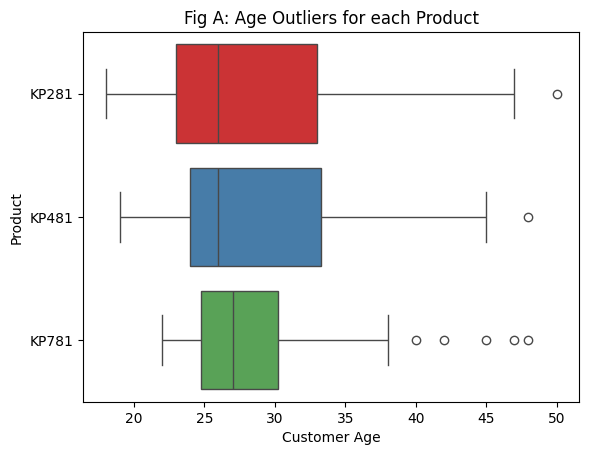

In [ ]:
# Figure A

sns.boxplot(data=data, x='Age', y='Product', palette='Set1', orient = 'h')

plt.title('Fig A: Age Outliers for each Product')
plt.ylabel('Product')
plt.xlabel('Customer Age')
plt.xticks(rotation = 0)
plt.show()

**Comments**: From the Boxplot, dollowing conclusions can be drawn:
*   The outliers are on the upper range of the data only. The age of the customers' ages lie well within the lower range of the data for all the three products
*   KP781 has the highest number of outliers for the customer range. There are 5 outlier points in KP781 data, while for the other two products, there exists only one outlier



In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Comments**:
Difference between mean and median for some key variables are as follows: (n = Mean, d = Mode)
**Age**: n-d = 2.78 years
**Education**: d-n = 0.428 years
**Usage**: n-d = 0.45 times
**Fitness**: n-d = 0.31
**Income**: n-d = 3123.07

For the above data, the difference between the median and mean parameters are not too high (**less than 10%** for each varaible, when compared to the mean value of the variable).


<ipython-input-34-d781993b0828>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Income', y='Product', palette='Set1', orient = 'h')


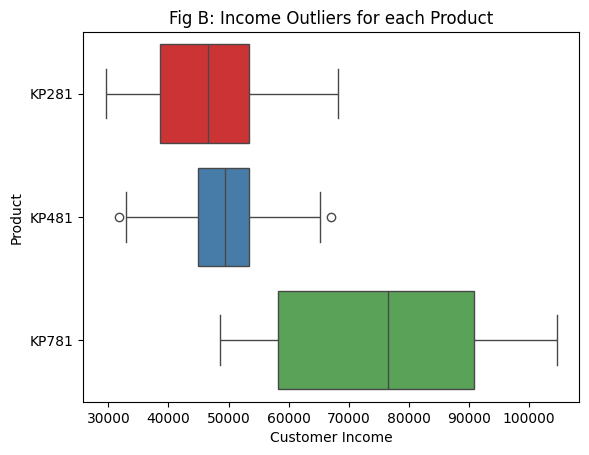

In [ ]:
# Figure B

sns.boxplot(data=data, x='Income', y='Product', palette='Set1', orient = 'h')

plt.title('Fig B: Income Outliers for each Product')
plt.ylabel('Product')
plt.xlabel('Customer Income')
plt.xticks(rotation = 0)
plt.show()

**Comments**: From the Boxplot, dollowing conclusions can be drawn:
*   The income outliers are for only one product (KP481) only. The income of customers for other two products lie well within the range of the boxplot.
*   the IQR of KP281 and 481 coincide. While it is not overlapping with the IQR of KP781

## Business Insights based on Non Graphical and Visual Analysis

**Insights based on Non Graphical Analysis**

> We have data of 180 different samples

> The age range of this dataset is from 18 to 50, while the income range is between 29562 to 104581, thus it is neither too high, nor too low

> There are 3 Products: KP281, KP481 and KP781

> KP281 is the most purchased product (80), followed by KP481 (60) and KP781 (40)

> Customers are mostly males (104 compared to 76 females)

> Partnered people have purchased more items (107), compared to single people (73)

> Product KP281 is purchased by group having lowest mean income (46418.025) as well as lowest mean age (28.55)

> Product KP781 is purchased by people who have the highest mean income (75441.575) as well as highest mean age (29.10)

> Product KP781 has the highest mean of miles (166.90)

**Insights based on Tabular Analysis**

> **Table 1**: The highest chance of a person purchasing a product is for KP281, which is 0.44. Lowest probability is for KP781 (0.22)

> **Table 2**:

*   For males, there is a probability of 50.0% that customers to purchase KP281, 51.7% to purchase KP481, while only 82.5% to purchase KP781.
*   For females, there is a probability of 50.0% that customers to purchase KP281, 48.3% to purchase KP481, while only 17.5% to purchase KP781.
*   Overall, males are more likely to buy (57.8% chance) these products compared to females (42.2% chance)

> **Table 3**:

*   For KP281, the most probable customers age group buying it is as follows : (20-30) > (30-40) > (40-50)= (below 20)
*   For KP481, the most probable customers age group buying it is as follows : (20-30) > (30-40) > (below 20) > (40-50)
*   For KP781, the most probable customers age group buying it is as follows : (20-30) > (30-40) > (40-50) > (below 20)
*   Overall, the most probable customers age group buying any of the three products is as follows : (20-30) > (30-40) > (40-50) > (below 20)























**Insights based on Visual Analysis**


> Fig 1: KP281 is brought equally by both genders. KP781 is brought mainly by males

> Fig 2: As customers, males have a larger age range for the three products. They also have a lower median age for KP281 and KP481

> Fig 3: Maximum products are purchased by people in the age group of 20-30 years and income group of 30000 to 70000

> Fig 4: Product purchase increases and then decreases as the age of the population increases. This is also evident from Fig 3

> Fig 5: Age & income have a direct correlation. Higher age is associated with higher income. KP781 has more miles on it compared to other products and is also brought by people of higher income

> Fig 6: KP781 has the highest chance of being purchased by someone in the age range 20-35. Compared to this, other two productshave more distributed probability over age. KP481 is the most purchased product between the age of 30-40

> Fig 7: All the three products have more probability of being purchased by partnered people than single people

> Fig A: The demography of KP481 is a subset of KP281's customers. The customers of both these groups show a good distribution with less outliers. On the other hand, KP781 shows a more even distribution with lots of outliers in the higher age range

> Fig B: Customer income trend shows an interesting trend: The income range of IQR KP281 and KP481 shows an overlap. However, the IQR of KP781 lies outside this range, showing that while the customers of KP281 & 481 might overlap, the customers buying KP781 are in a higher income group altogether



















## Recommendations

>  KP281 is popular with both males and females. The accesories, advertisements and offers should be designed while taking these things into account. These things should be gender neutral for this product line

>  KP781, on contrary is bought by people who use it a lot, evident from the miles collected. It should be geared towards indivudals that have the income on the higher side, advertisements and offers should be designed as such. Costlier accesories can be given with it, and it should be more male oriented as the product's primary buyers are males.

>  The best demography to target for selling these products are people between the age of 20 to 40 years. The highest sales is made in this age segment across the entire product line. Older and younger people are not purchasing these products in such numbers. This should be taken care of while devising strategies related to the products.

> When it comes to the income group, a big chunk of customers come from the income group between 30-50k. For increasing the volume of sales, more focus can be given to products that can be brought by people from this income range.

>  KP481 and KP281 has a customer overlap. However, KP481 is more popular among people of 30-40 age group compared to the KP281. the cause should be studied and the results can be used to improve KP281, if possible.

> The demography buying KP781 and KP281/KP481 is entirely different when it comes to income. While the demography of KP281 and KP481 shows a big overlap. Causes need to be studies as to why people prefer one over the other, despite having similar purchasing powers. The products can be either made different to attract the different subsets of people, or can be combined into one for ease of production.

> There is a direct correlation between the age and average income of the customers. The people in on the higher side of these two categories prefer KP781. Thsi demography can be exploited more by offering accesories and offers that are at a premium

>  The age range of female customers is lower than males. Out of the given products, KP281 is the most liked product by the female customers of a wide age range. The cause should be studied as to why product KP281 enjoys such popularity, whether iit is due to the cost, or there are some design differences.  



> Customer Profile for each prooduct

*   KP281: Both women and men buy it. Higher chance of being bought by a married individual. The customer has a high probability of lying in the age range of 20-40 yrs. Most popular product among the younger customers, who comparatively have a lower income

*   KP481: Men buy it more than women.Higher chance of being bought by a married individual. Mostly bought by people falling in the 20-40 range, yet most popular product frop people in age group 30-40. Comparatively less popular among the youth (< 25 yrs age), who prefer KP281 over this

*   KP781: Bought by people with higher median age and salary. Married men are the most likely customers who intend to use it a lot.

*   Overall: Partnered men are more likely to buy a product, who fall in the age range 30-40, lying in an income range of 30-70 K







# Predicting Customer Behavior through K Nearest Neighbor Algorithm

In [ ]:
# Creating a data copy to work with

df = data.copy()

In [ ]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Cat,Income_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,below 20,below 30K
1,KP281,19,Male,15,Single,2,3,31836,75,below 20,30K-50K
2,KP281,19,Female,14,Partnered,4,3,30699,66,below 20,30K-50K


In [ ]:
# Dropping the bin categories

df.drop(['Age_Cat', 'Income_Cat'], axis=1, inplace=True)

In [ ]:
# One Hot Encoding the Categorical Data

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df[['Gender', 'MaritalStatus']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatenating the encoded columns with the original DataFrame

df = pd.concat([df.drop(['Gender', 'MaritalStatus'], axis=1), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head(3)

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Single
0,KP281,18,14,3,4,29562,112,1.0,1.0
1,KP281,19,15,2,3,31836,75,1.0,1.0
2,KP281,19,14,4,3,30699,66,0.0,0.0


In [ ]:
# Selecting the dependant and Independent data

x = df.iloc[:, 1:9].values
y = df.iloc[:, 0].values

In [ ]:
# Dividing the data into Train and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

# Only the Numerical Independent (Numerical) columns were standardised

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# With arbitrary no.s of neighbors

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('For K = 5')
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

For K = 5

Confusion Matrix
[[12  4  1]
 [ 8  3  0]
 [ 0  0  8]]

Classification Report
              precision    recall  f1-score   support

       KP281       0.60      0.71      0.65        17
       KP481       0.43      0.27      0.33        11
       KP781       0.89      1.00      0.94         8

    accuracy                           0.64        36
   macro avg       0.64      0.66      0.64        36
weighted avg       0.61      0.64      0.62        36



In [ ]:
# Selecting best no. of neighbors through elbow method

error_rate = []

# will take some time

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

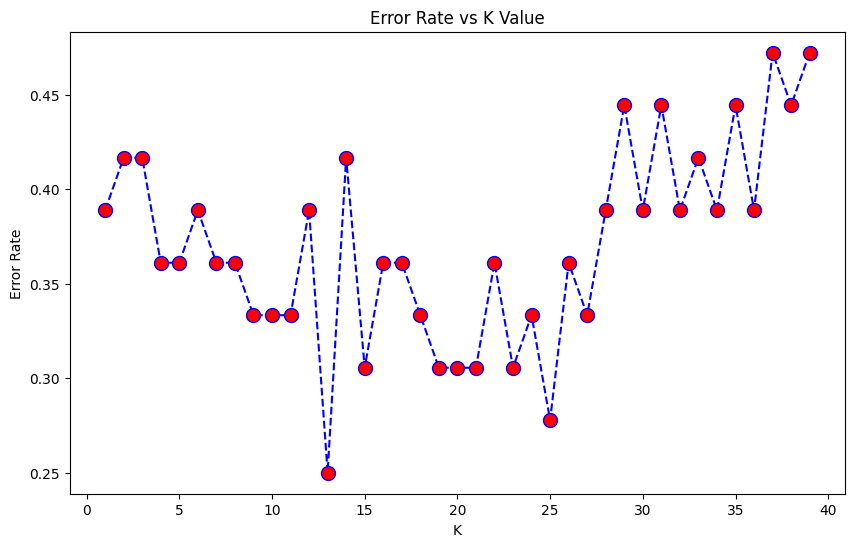

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate,
         color='blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# With Optimised K

knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('For K = 14')
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

For K = 14

Confusion Matrix
[[9 7 1]
 [7 4 0]
 [0 0 8]]

Classification Report
              precision    recall  f1-score   support

       KP281       0.56      0.53      0.55        17
       KP481       0.36      0.36      0.36        11
       KP781       0.89      1.00      0.94         8

    accuracy                           0.58        36
   macro avg       0.61      0.63      0.62        36
weighted avg       0.57      0.58      0.58        36



**Results**

Overall Accuracy:
58% accuracy is moderate. The model correctly predicted 58% of the instances.

Class-wise Performance:

KP281: Precision and recall are both around 0.56, indicating a balanced performance.
    
KP481: Precision and recall are low, suggesting that the model struggles to correctly classify this class.
    
KP781: High precision and perfect recall for this class indicate excellent performance.

Macro Average: A value of 0.62 is moderate.

Weighted Average: The weighted average takes into account the support (number of instances) for each class. It provides a more representative evaluation, especially when classes have unbalanced support. In this case, the weighted average is slightly lower than the macro average, indicating that the performance is influenced by the class with more instances (KP281).

**Conclusions:** While the overall accuracy is moderate,
 the performance varies significantly across different classes. The model excels at classifying KP781 but struggles with KP481.